In [26]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from scipy.stats.stats import pearsonr
import scipy
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sb
from pylab import rcParams
from sklearn.cluster import KMeans
%matplotlib inline

In [27]:
data = pd.read_csv('/Users/ramazan/Desktop/solar.csv')
data

,Data,Time,Radiation,Temperature,Pressure,Humidity,Speed
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,5.62
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,3.37
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,3.37
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,3.37
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,5.62
5,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,5.62
6,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,6.75
7,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,5.62
8,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,4.50
9,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,4.50


In [28]:
data.n=data
data.n

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Data,Time,Radiation,Temperature,Pressure,Humidity,Speed
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,5.62
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,3.37
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,3.37
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,3.37
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,5.62
5,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,5.62
6,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,6.75
7,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,5.62
8,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,4.50
9,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,4.50


In [29]:
x = data.n.iloc[:, :-1]
y = data.n.iloc[:, 6]

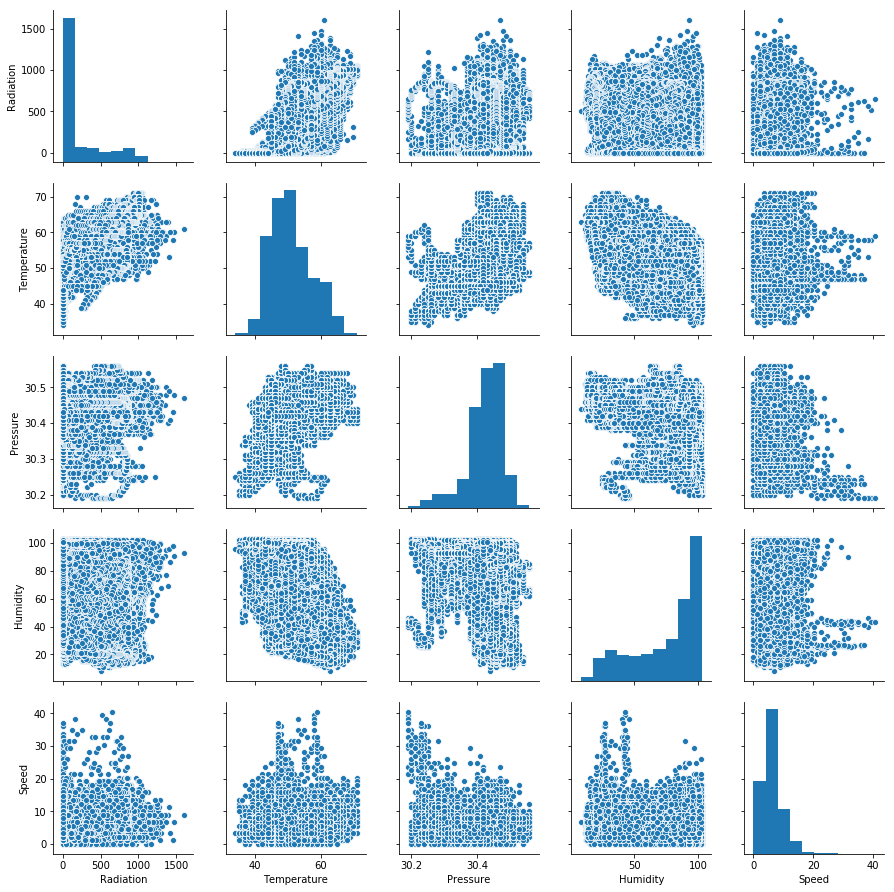

In [30]:
x = data.n[['Data' ,'Time','Radiation' ,'Temperature', 'Pressure', 'Humidity', 'Speed']]
sb.pairplot(x)

In [31]:
x = data.n[['Data' ,'Time','Radiation' ,'Temperature', 'Pressure', 'Humidity', 'Speed']]
x.corr()

,Radiation,Temperature,Pressure,Humidity,Speed
Radiation,1.000000,0.734955,0.119016,-0.226171,0.073627
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.031458
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.083639
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.211624
Speed,0.073627,-0.031458,-0.083639,-0.211624,1.000000


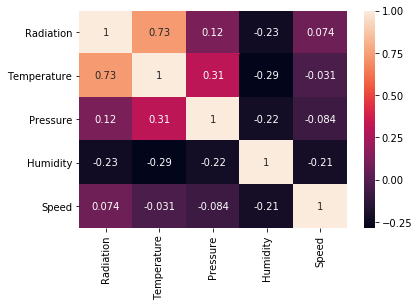

In [32]:
import seaborn as sns

cols = ['Data' ,'Time','Radiation', 'Temperature', 'Pressure', 'Humidity', 'Speed']
hm = sns.heatmap(data.n[cols].corr(),
                 cbar=True,
                 annot=True)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [34]:
lr = lm.LinearRegression()

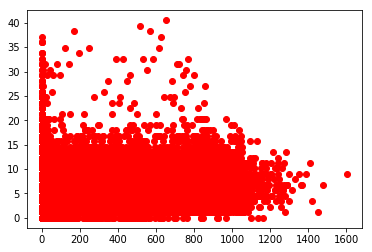

In [35]:
x = data.n.iloc[:, 2]
y = data.n.iloc[:, 6]
plt.scatter(x,y,color = 'red')

('R-squared for degree 3 = ', 0.0083809915447014)
('R-squared for degree 4 = ', 0.008556090834769492)
('R-squared for degree 5 = ', 0.008588499348914258)
('R-squared for degree 6 = ', 0.007878042069643376)
('R-squared for degree 7 = ', 0.007707247607952938)


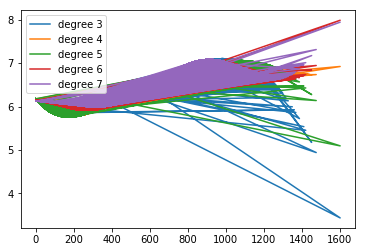

In [36]:
for deg in [3, 4, 5, 6, 7]:
    lr.fit(np.vander(x, deg + 1), y)
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg))
    plt.legend(loc=2)
    print ("R-squared for degree " + str(deg) + " = ", r2_score(y, y_lr))
plt.show()

In [37]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans

%matplotlib inline

In [53]:
from sklearn import preprocessing
import numpy as np
dataNorm = preprocessing.scale(x)

In [54]:
data_dist = pdist(dataNorm, 'euclidean')

data_linkage = linkage(data_dist, method='average')

ValueError: A 2-dimensional array must be passed.